# Exploratory Data Analysis

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

> Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

> The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### Defining the Question

> In order to work on the above problem, you need to do the following:

> Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
> Find and deal with outliers, anomalies, and missing data within the dataset.
> Perform univariate, bivariate and multivariate analysis recording your observations.
> Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
> Challenge your solution by providing insights on how you can make improvements.

## Univariate Analysis

### 2. Reading the Data

In [0]:
# importing Python modules
# ----
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [128]:
# Loading the Data from the source i.e. csv
# Creating a dataframe
# Viewing the first five rows of our dataset.
# ----
url = "Financial Dataset - 1.csv"
df = pd.read_csv(url)
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [129]:
df["Type of Job"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

In [130]:
df['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [131]:
df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

### 3. Checking the Data

In [132]:
# Determining the no. of records in our dataset
#
df.count()

country                   23510
year                      23524
uniqueid                  23524
Has a Bank account        23488
Type of Location          23509
Cell Phone Access         23513
household_size            23496
Respondent Age            23490
gender_of_respondent      23490
The relathip with head    23520
marital_status            23492
Level of Educuation       23495
Type of Job               23494
dtype: int64

In [133]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


### 4. External Data Source Validation

### 5. Tidying the Dataset

In [134]:
# Getting columns from our dataframe
#
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [135]:
# Getting the uniques values from our countries column
# ----
df['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

country
Kenya       24195.0
Rwanda      39113.0
Tanzania    12732.0
Uganda      10441.0
Name: household_size, dtype: float64


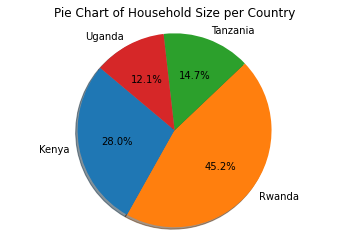

In [136]:
# Pie Chart of Household size per country.
# ----
country = df.groupby(['country'])['household_size'].sum()
print(country)

labels = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']

plt.pie(country, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Household Size per Country')
plt.show()

country
Kenya       240257.0
Rwanda      342662.0
Tanzania    253552.0
Uganda       74503.0
Name: Respondent Age, dtype: float64


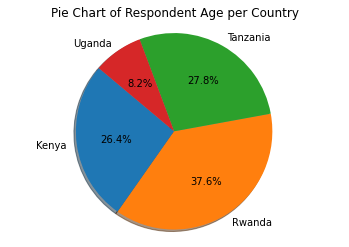

In [137]:
# Pie Chart of Respondent Age per country.
# ----
country = df.groupby(['country'])['Respondent Age'].sum()
print(country)

labels = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']

plt.pie(country, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Respondent Age per Country')
plt.show()

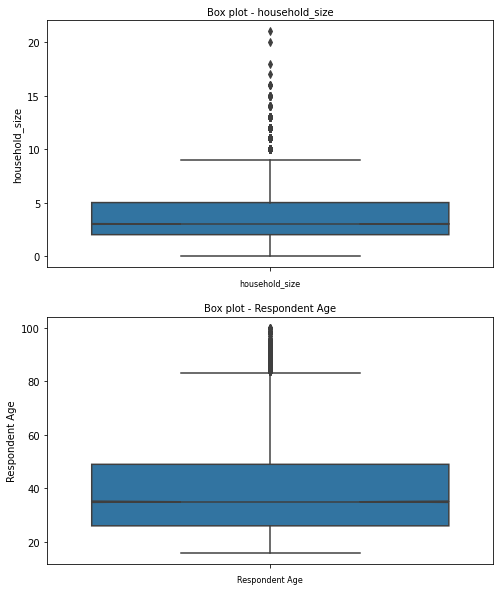

In [138]:
# Checking for outliers
# ----
col_names = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val], notch=True, ax=ax[i])
  ax[i].set_title("Box plot - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [139]:
# Identifying the Missing Data
#
df.isnull().values.any()

True

In [0]:
# Dealing with the Missing Data
# -----
df.dropna(axis=0, inplace=True)

In [141]:
# More data cleaning procedures
#
df.duplicated().values.any()

False

### 6. Exploratory Analysis

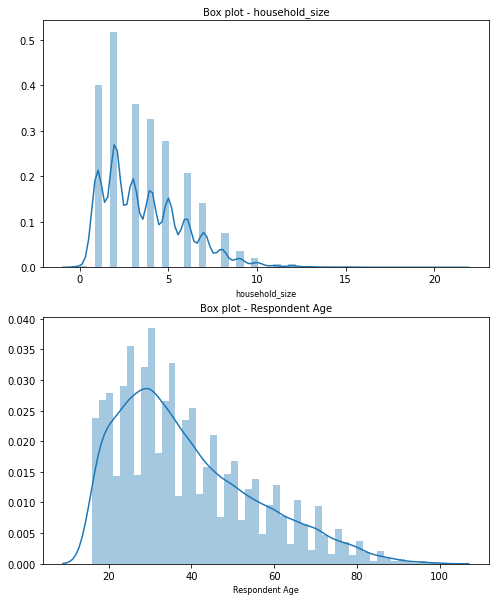

In [142]:
col_names = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.distplot(df[col_val], hist=True, ax=ax[i])
  ax[i].set_title("Box plot - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

### 7. Implementing the Solution

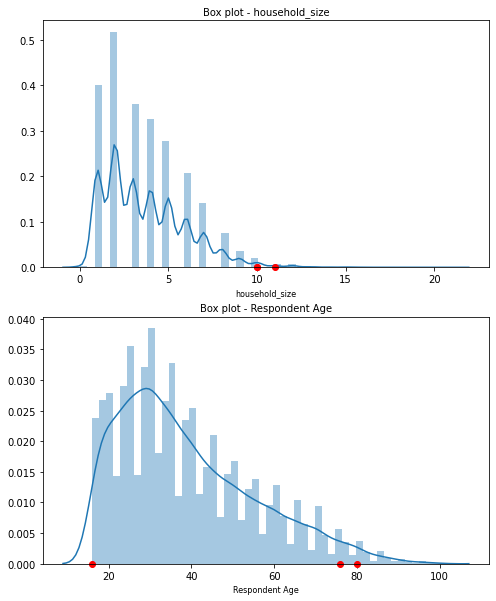

In [143]:
# Highlighting outliers
# ----
def percentile_based_outlier(data, threshold=95):
  diff = (100 - threshold)/2
  minval, maxval = np.percentile(data, [diff, 100-diff])
  return (data<minval) | (data>maxval)

col_names = ['household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  x = df[col_val][:100]
  sns.distplot(df[col_val], hist=True, ax=ax[i])
  outliers = x[percentile_based_outlier(x)]
  ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

  ax[i].set_title("Box plot - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [144]:
# Checking for Anomalies
#
house1, house3 = np.percentile(df['household_size'], [25, 75]) 
iqr = house3 - house1
l_bound = house1 - (1.5*iqr)
u_bound = house3 + (1.5 * iqr)

print(f"   household_size\nLower - {l_bound}\nUpper - {u_bound}\nIQR - {iqr}")

   household_size
Lower - -2.5
Upper - 9.5
IQR - 3.0


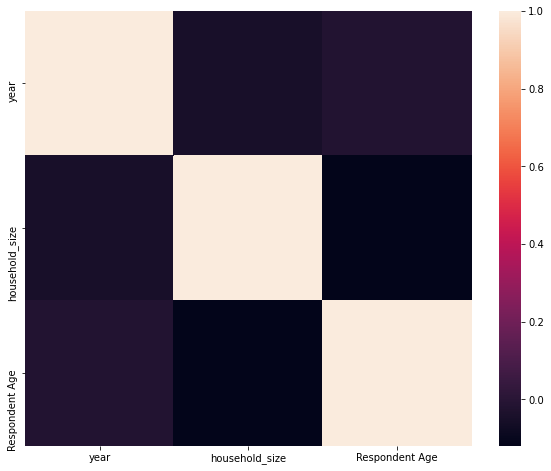

In [145]:
# Correlation Matrix
# ----
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,\
           xticklabels=corr.columns.values,\
           yticklabels=corr.columns.values)

## Bivariate Analysis

> ### 1. Reading the Data

In [146]:
# Previewing The top of our dataset
# ----
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


> ### 2. Checking the Data

In [147]:
# Determining the no. of records in our dataset
#
df.count()

country                   23343
year                      23343
uniqueid                  23343
Has a Bank account        23343
Type of Location          23343
Cell Phone Access         23343
household_size            23343
Respondent Age            23343
gender_of_respondent      23343
The relathip with head    23343
marital_status            23343
Level of Educuation       23343
Type of Job               23343
dtype: int64

In [148]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has a Bank account      23343 non-null  object 
 4   Type of Location        23343 non-null  object 
 5   Cell Phone Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  Type of Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


> ### 3. Tidying the Dataset

In [149]:
# Replacing the spaces in our column namesa with _(underscore).
df.columns = df.columns.str.replace(" ", "_")
df.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


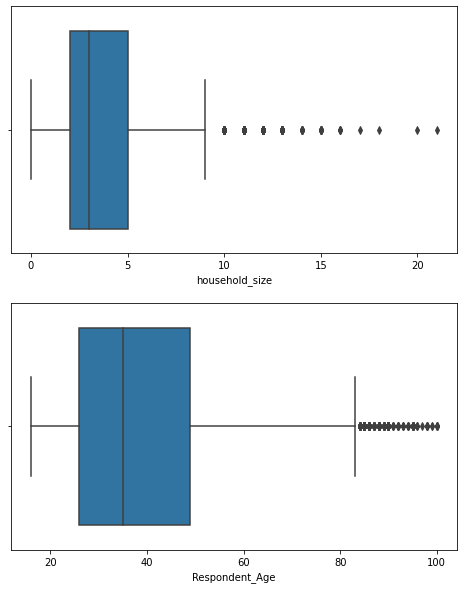

In [150]:
# Checking for Outliers
#
col_names = ['household_size', 'Respondent_Age']
 
fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.boxplot(df[col_val], ax=ax[i])
  
plt.show()

In [151]:
# Identifying missing data
# ----
df.isnull().values.any()

False

In [0]:
# Selecting only the numerical columns
# ----
df_n = df.iloc[:, 6:8]

### Exploratory Analysis

In [153]:
df_n.head()

,household_size,Respondent_Age
0,3.0,24.0
1,5.0,70.0
2,5.0,26.0
3,5.0,34.0
4,8.0,26.0


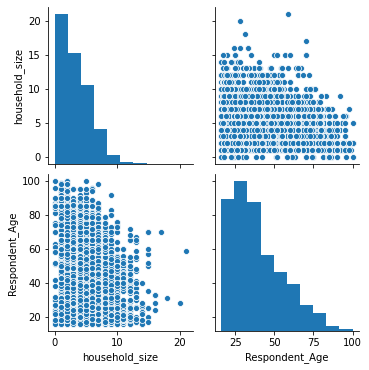

In [154]:
# Ploting the bivariate summaries 
#
sns.pairplot(df_n)
plt.show()

#### Implementing the solution

In [155]:
# Checking for Anomalies
#
house1, house3 = np.percentile(df_n['household_size'], [25, 75]) 
iqr = house3 - house1
l_bound = house1 - (1.5*iqr)
u_bound = house3 + (1.5 * iqr)

print(f"   household_size\nLower - {l_bound}\nUpper - {u_bound}\nIQR - {iqr}")

   household_size
Lower - -2.5
Upper - 9.5
IQR - 3.0


In [156]:
# Deleting our outliers.
#
df_finance = df_n[~((df_n < (house1 - 1.5 * iqr)) |(df_n > (house3 + 1.5 * iqr))).any(axis=1)]
print(df_finance.shape)

(0, 2)


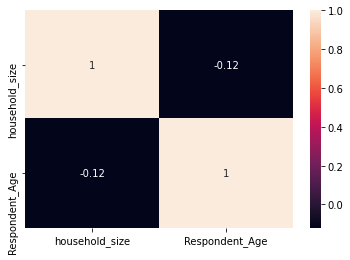

In [157]:
# Plotting a heatmap
#
sns.heatmap(df_n.corr(), annot=True)
plt.show()

# Multivariate Analysis

> ## 1) Principal Component Analysis<font></font>

> #### Reading the Data

In [0]:
df = pd.read_csv(url)

> #### Checking our Data

In [159]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


> #### Tidying the Data


In [160]:
# Replacing the spaces in our column namesa with _(underscore).
df.columns = df.columns.str.replace(" ", "_")
df.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [161]:
# Dropping unnecessary columns 
# 
df.drop(['year', 'uniqueid','The_relathip_with_head', 'marital_status', 'Level_of_Educuation', 'Type_of_Job'],axis=1,inplace=True)
df.head()

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female
1,Kenya,No,Rural,No,5.0,70.0,Female
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male
3,Kenya,No,Rural,Yes,5.0,34.0,Female
4,Kenya,No,Urban,No,8.0,26.0,Male


> #### Exploratory Analysis

In [0]:
country = {'Kenya':1, "Tanzania":2, "Rwanda":3}
bank = {'Yes': 1, 'No': 0}
location = {"Urban":1, "Rural":0}
cellphone = {"Yes":1, "No":0}
gender = {"Male":1, "Female":0}

df['Has_a_Bank_account'] = df['Has_a_Bank_account'].map(bank)
df['Type_of_Location'] = df['Type_of_Location'].map(location)
df['Cell_Phone_Access'] = df['Cell_Phone_Access'].map(cellphone)
df['gender_of_respondent'] = df['gender_of_respondent'].map(gender)

In [0]:
df.dropna(inplace=True)

In [0]:
# Preprocessing
# Divide the dataset into a feature set and corresponding labels. 
# 
# 
X = df.iloc[:, 4:9]
y = df['Has_a_Bank_account']

In [0]:
# Splitting the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Normalization
#
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Applying PCA
#
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [84]:
# Explained Variance Ratio
#
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3728421 , 0.33367509, 0.29348281])

In [0]:
# Using principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [169]:
# Training and Making Predictions
#
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [170]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 4008 out of 4669 instances, 
# resulting in 85.86% accuracy.

[[4022    0]
 [ 656    0]]
Accuracy 0.8597691321077383


> ## 2) Factor Analysis

> #### Reading the Data

In [0]:
# Creating our dataframe
#
df = pd.read_csv(url)

> #### Checking the Data

In [172]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [173]:
# Previewing the dataset columns
# 
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

> #### Tidying the Data

In [174]:
# Replacing the spaces in our column namesa with _(underscore).
df.columns = df.columns.str.replace(" ", "_")
df.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [175]:
# Dropping unnecessary columns 
# 
df.drop(['country', 'year', 'uniqueid','The_relathip_with_head', 'marital_status', 'Level_of_Educuation', 'Type_of_Job'],axis=1,inplace=True)
df.head()

,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent
0,Yes,Rural,Yes,3.0,24.0,Female
1,No,Rural,No,5.0,70.0,Female
2,Yes,Urban,Yes,5.0,26.0,Male
3,No,Rural,Yes,5.0,34.0,Female
4,No,Urban,No,8.0,26.0,Male


In [0]:
# Dropping missing values rows
#
df.dropna(inplace=True)

In [0]:
# Converting our column objects to float values
#
bank = {'Yes': 1, 'No': 0}
location = {"Urban":1, "Rural":0}
cellphone = {"Yes":1, "No":0}
gender = {"Male":1, "Female":0}

df['Has_a_Bank_account'] = df['Has_a_Bank_account'].map(bank)
df['Type_of_Location'] = df['Type_of_Location'].map(location)
df['Cell_Phone_Access'] = df['Cell_Phone_Access'].map(cellphone)
df['gender_of_respondent'] = df['gender_of_respondent'].map(gender)

In [178]:
df.head()

,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent
0,1,0,1,3.0,24.0,0
1,0,0,0,5.0,70.0,0
2,1,1,1,5.0,26.0,1
3,0,0,1,5.0,34.0,0
4,0,1,0,8.0,26.0,1


> #### Exploratory Analysis

In [0]:
# Preprocessing
# Divide the dataset into a feature set and corresponding labels. 
# 
# 
X = df.iloc[:, 1:6]
y = df["Has_a_Bank_account"]

In [180]:
# Bartlett’s test of sphericity check
#
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(4745.188857422792, 0.0)

In [0]:
# Kaiser-Meyer-Olkin (KMO) Test
#
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)

In [182]:
pip install factor_analyzer==0.2.3

In [183]:
# Choosing the Number of Factors
# 
# 
from factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation='varimax')

fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
Has_a_Bank_account,-0.071203,0.487706,0.031140,0.153992,0.193605
Type_of_Location,-0.571338,0.148936,-0.162546,-0.181396,0.042119
Cell_Phone_Access,0.113948,0.238896,-0.148905,0.471285,0.170792
household_size,0.564250,0.044840,-0.211907,-0.030102,0.035757
Respondent_Age,-0.030518,0.016273,0.502406,-0.071547,0.023934
gender_of_respondent,0.000872,0.094917,0.016311,0.059840,0.311060


In [184]:
# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.360075
1,1.276073
2,1.039936
3,0.908045
4,0.762791
5,0.653080


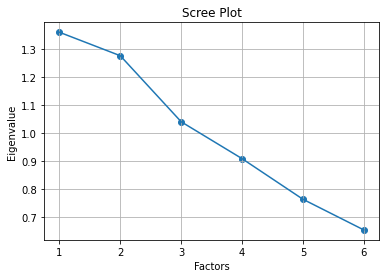

In [185]:
 # Creating a scree plot using matplotlib
#
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [186]:
# Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation='varimax')
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
Has_a_Bank_account,-0.071203,0.487706,0.031140,0.153992,0.193605
Type_of_Location,-0.571338,0.148936,-0.162546,-0.181396,0.042119
Cell_Phone_Access,0.113948,0.238896,-0.148905,0.471285,0.170792
household_size,0.564250,0.044840,-0.211907,-0.030102,0.035757
Respondent_Age,-0.030518,0.016273,0.502406,-0.071547,0.023934
gender_of_respondent,0.000872,0.094917,0.016311,0.059840,0.311060


In [187]:
# Getting variance of each factors
# 
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,0.663791,0.328395,0.347145,0.288334,0.167037
Proportion Var,0.110632,0.054732,0.057858,0.048056,0.027839
Cumulative Var,0.110632,0.165364,0.223222,0.271278,0.299117


> ## 3) Discriminant Analysis

> #### Reading the Data

In [0]:
# Creating our dataframe
# 
df = pd.read_csv(url)

> #### Checking the Data

In [189]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


> #### Tidying the Data

In [190]:
# Replacing the spaces in our column namesa with _(underscore).
df.columns = df.columns.str.replace(" ", "_")
df.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [191]:
# Dropping unnecessary columns 
# 
df.drop(['country', 'year', 'uniqueid','The_relathip_with_head', 'marital_status', 'Level_of_Educuation', 'Type_of_Job'],axis=1,inplace=True)
df.head()

,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent
0,Yes,Rural,Yes,3.0,24.0,Female
1,No,Rural,No,5.0,70.0,Female
2,Yes,Urban,Yes,5.0,26.0,Male
3,No,Rural,Yes,5.0,34.0,Female
4,No,Urban,No,8.0,26.0,Male


In [0]:
# Dropping missing values rows
#
df.dropna(inplace=True)

In [0]:
# Converting our column objects to float values
#
bank = {'Yes': 1, 'No': 0}
location = {"Urban":1, "Rural":0}
cellphone = {"Yes":1, "No":0}
gender = {"Male":1, "Female":0}

df['Has_a_Bank_account'] = df['Has_a_Bank_account'].map(bank)
df['Type_of_Location'] = df['Type_of_Location'].map(location)
df['Cell_Phone_Access'] = df['Cell_Phone_Access'].map(cellphone)
df['gender_of_respondent'] = df['gender_of_respondent'].map(gender)

In [194]:
df.head()

,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent
0,1,0,1,3.0,24.0,0
1,0,0,0,5.0,70.0,0
2,1,1,1,5.0,26.0,1
3,0,0,1,5.0,34.0,0
4,0,1,0,8.0,26.0,1


> #### Exploratory Ananlysis

In [0]:
# Preprocessing
# Divide the dataset into a feature set and corresponding labels. 
# 
# 
X = df.iloc[:, 1:6]
y = df["Has_a_Bank_account"]

In [0]:
# Step 4: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Step 5: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Performing Linear Discriminant Analysis
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [0]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [200]:
# Evaluating the Performance
#

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4015    0]
 [ 666    0]]
Accuracy0.8577227088229011
